In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:

data = pd.read_csv("https://drive.google.com/uc?id=1vvYQ6JIbBA3bG8knCDQTRgO1rBKwBbHn")

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Select relevant columns
columns_to_use = ['Gender', 'Age', 'Physical Activity Level', 'Stress Level','Sleep Duration', 'Quality of Sleep']
data = data[columns_to_use]

# Encode Gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male = 1, Female = 0

# Split features and target
X = data[['Gender', 'Age', 'Physical Activity Level', 'Stress Level','Sleep Duration']]
y = data['Quality of Sleep']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(array([[1.        , 0.5       , 0.25      , 0.8       , 0.25925926],
        [1.        , 0.1875    , 0.        , 1.        , 0.07407407],
        [1.        , 0.25      , 0.5       , 0.4       , 0.62962963],
        [0.        , 1.        , 0.75      , 0.        , 0.88888889],
        [0.        , 0.0625    , 0.16666667, 0.8       , 0.25925926]]),
 192    6
 75     6
 84     8
 362    9
 16     5
 Name: Quality of Sleep, dtype: int64)

In [ ]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Tuned learning rate
    loss='mse',  # Mean squared error for regression
    metrics=['mae']  # Mean absolute error
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    epochs =50,
    validation_data = (X_test, y_test),
    callbacks = []
)


loss, mae = model.evaluate(X_test, y_test)
print(f"[Test loss: {loss:.4f}, Test MAE: {mae:.4f}]")

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 40.9199 - mae: 6.0119 - val_loss: 15.0131 - val_mae: 3.4440
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6857 - mae: 2.4047 - val_loss: 4.1362 - val_mae: 1.8745
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9660 - mae: 1.5078 - val_loss: 1.9972 - val_mae: 1.1560
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5410 - mae: 1.0170 - val_loss: 1.1882 - val_mae: 0.8364
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1649 - mae: 0.8419 - val_loss: 0.7224 - val_mae: 0.7639
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6738 - mae: 0.7288 - val_loss: 0.5441 - val_mae: 0.5615
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5524 - mae: 0.5770 - val_loss: 0.5043 - val_mae: 0.6234
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4737 - mae: 0.5655 - val_loss: 0.4357 - val_mae: 0.5664
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4336 - ma

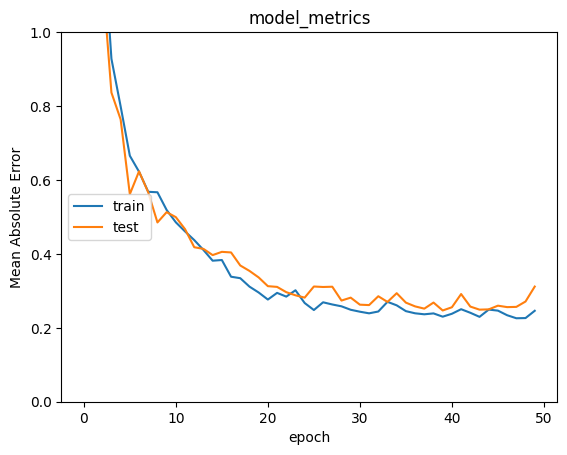

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model_metrics')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1.0)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
# Example custom input: Gender (1), Age (25), Physical Activity (30), Stress Level (5)
new_input = [[1, 25, 30, 5,7]]
new_input_scaled = scaler.transform(new_input)  # Ensure scaling is applied
prediction = model.predict(new_input_scaled)
print(f"Predicted Quality of Sleep: {prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Quality of Sleep: 7.39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Tuning

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def model_builder(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(
        units=hp.Int('input_units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    # Add a second dense layer with tunable units
    model.add(Dense(
        units=hp.Int('hidden_units', min_value=32, max_value=512, step=32),
        activation='relu'
    ))

    # Output layer
    model.add(Dense(1))  # Single neuron for regression

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',  # Mean squared error for regression
        metrics=['mae']  # Mean absolute error
    )
    return model

In [ ]:
# Initialize the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_mae',  # Minimize validation MAE
    max_epochs=50,
    factor=2,
    directory='tuner_dir',
    project_name='sleep_quality_tuning'
)

Reloading Tuner from tuner_dir/sleep_quality_tuning/tuner0.json


In [ ]:
# Early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')}, in the second layer is {best_hps.get('hidden_units')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 96, in the second layer is 320,
and the optimal learning rate for the optimizer is 0.01.



In [ ]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"[Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}]")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 36.6072 - mae: 5.6202 - val_loss: 5.5856 - val_mae: 2.0907
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4513 - mae: 1.7944 - val_loss: 3.0773 - val_mae: 1.5113
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4135 - mae: 1.2412 - val_loss: 1.1632 - val_mae: 0.9345
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2284 - mae: 0.9036 - val_loss: 0.6871 - val_mae: 0.6456
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0026 - mae: 0.8432 - val_loss: 0.5442 - val_mae: 0.5781
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7156 - mae: 0.6166 - val_loss: 0.4987 - val_mae: 0.6108
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5929 - mae: 0.6916 - val_loss: 0.4793 - val_mae: 0.5117
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4485 - mae: 0.5016 - val_loss: 0.3429 - val_mae: 0.5284
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3634 - mae: 0.5223 - val_loss: 0.298

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


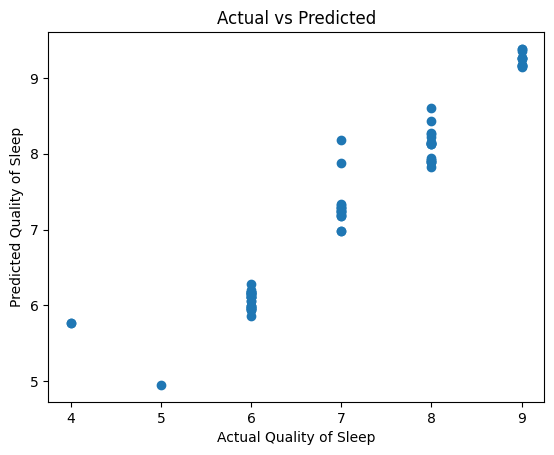

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.save('best_model_sleepquality.keras')